In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
import time

year_count=0

months=['january','february','march','april','may','june','july','august','september','october','november','december']
year=2019
try:
    while True:

        if year_count >12:
            year+=1
            year_count=0
            #C:\Users\PK\Desktop

        driver = webdriver.Chrome(executable_path='C:/Users/HP/Desktop/folders/others/chromedriver/chromedriver.exe')

        for month in months:
            url=f"https://data.gov.in/resources/farmers-queries-kisan-call-centre-kcc-belgaum-district-karnataka-month-{month}-{year}"
            year_count+=1
            #driver = webdriver.Chrome(executable_path='/Users/PK/Desktop/chromedriver/chromedriver.exe')

            driver.get(url)

           # xpath2='//*[@id="edit-submit"]'
            #xpath1='//*[@id="csv-6609277"]/a'
            xpath='/html/body/div[1]/div[1]/div/div[7]/div/div[2]/section/div/div/div/div/div/article/div/div/div[2]/div/div/div/div[10]/span/ul/li[2]/a'

            driver.find_element_by_xpath(xpath).click()
            time.sleep(2)

            driver.find_element_by_id("edit-download-reasons").click()

            driver.find_element_by_id("edit-reasons-d").click()

            driver.find_element_by_id("edit-submit").click()

            list1=[]
            import os
            arr = os.listdir(r"C:/Users/HP/Downloads")
            for i in arr:
                if 'datafile' in i:
                        list1.append(i)
            file=list1[0]
            import shutil
            source=r"C:/Users/HP/Downloads/"+file
            destination=f"C:/Users/HP/Desktop/folders/working_projects/mam/datasets/datafile-{month}-{year}.csv"
            shutil.copy(source, destination)
            import csv
            import os
            path='C:/Users/HP/Desktop/folders/working_projects/mam/datasets'
            files = os.listdir(path)
            paths = [os.path.join(path, basename) for basename in files]

            file2= max(paths, key=os.path.getctime)
            src=file2
            # src = f'C:/Users/HP/Desktop/folders/working_projects/mam/datasets/{file2}'
            dest = 'C:/Users/HP/Desktop/folders/working_projects/mam/original.csv'
            with open(src, 'r') as f:
                reader = csv.reader(f)
                mylist1 = list(reader)


            with open(dest, 'r') as g:
                reader = csv.reader(g)
                mylist2 = list(reader)

            if mylist1 == mylist2:
                 print("no updated file found")

            else:
                    with open(src, 'r') as f1:
                        original = f1.read()

                    with open(dest, 'a') as f2:
                            f2.write('\n')
                            f2.write(original)

                    print(f"{month}-{year} datafile updated")
                    
except:
    pass

In [61]:

import nltk
nltk.download('punkt')

import string
from sklearn.feature_extraction.text import TfidfVectorizer

stemmer = nltk.stem.porter.PorterStemmer()
remove_punctuation_map = dict((ord(char), None) for char in string.punctuation)

def stem_tokens(tokens):
    return [stemmer.stem(item) for item in tokens]

# remove punctuation, lowercase, stem
def normalize(text):
    return stem_tokens(nltk.word_tokenize(text.lower().translate(remove_punctuation_map)))

vectorizer = TfidfVectorizer(tokenizer=normalize, stop_words='english')

def cosine_sim(text1, text2):
    tfidf = vectorizer.fit_transform([text1, text2])
    return ((tfidf * tfidf.T).A)[0, 1]


import csv


def getRows(filename):
    topics = []
    with open(filename, mode='r', encoding='utf8', errors='ignore') as csv_file:
        csv_reader = csv.DictReader(csv_file)
        line_count = 0
        for row in csv_reader:
            if line_count == 0:
                # print(f'Column names are {", ".join(row)}')
                line_count += 1
            topics.append(row["QueryText"])
            # print(row["Topic"])
            line_count += 1
        print(f'Processed {line_count} lines.')
        return topics
    

if __name__ == '__main__':
    print('Loading file...')
    # loading dataset.csv file
    filename = r"C:\Users\HP\Desktop\folders\working_projects\mam\newdata.csv"  # name of the file to be loaded 
    topic_list = getRows(filename)

    input_string = input('Enter the search string: ')

    cosine_list = {}
    for i, x in enumerate(topic_list):
        cosine_list.update({i: cosine_sim(x, input_string)})
    sorted_list = sorted(cosine_list.items(), key=lambda x: x[1], reverse=True)

    # print the top 10 results along with their cosine similarity
    print('Top 10 match results: ')
    print("%15s" % ("Topic") + ":  %10s"%("Cosine Sim Number"))
    for x in sorted_list[:10]:
        print("%30s" %(topic_list[x[0]]) + ':  %10s'% (str(x[1])))

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Loading file...
Processed 57 lines.
Enter the search string: SQLStatement.execute() - multiple queries in o...
Top 10 match results: 
          Topic:  Cosine Sim Number
SQLStatement.execute() - multiple queries in one statement:  0.6029748160380572
MySQL/Apache Error in PHP MySQL query:  0.1273595297947935
How can I Java webstart multiple, dependent, native libraries?:  0.11521554337793122
Good branching and merging tutorials for TortoiseSVN?:         0.0
             ASP.NET Site Maps:         0.0
Function for creating color wheels:         0.0
Adding scripting functionality to .NET applications:         0.0
Should I use nested classes in this case?:         0.0
Homegrown consumption of web services:         0.0
Deploying SQL Server Databases from Test to Live:         0.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'formerli', 'forti', 'ha', 'henc', 'hereaft', 'herebi', 'hi', 'howev', 'hundr', 'inde', 'latterli', 'mani', 'meanwhil', 'moreov', 'mostli', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'seriou', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'thi', 'thu', 'togeth', 'twelv', 'twenti', 'veri', 'wa', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop

In [2]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv(r"C:\Users\HP\Desktop\folders\working_projects\mam\newdata.csv",encoding = "ISO-8859-1")
data

,QueryText,KccAns
0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...
5,Should I use nested classes in this case?,<p>I am working on a collection of classes use...
6,Homegrown consumption of web services,<p>I've been writing a few web services for a ...
7,Deploying SQL Server Databases from Test to Live,<p>I wonder how you guys manage deployment of ...
8,Automatically update version number,<p>I would like the version property of my app...
9,Visual Studio Setup Project - Per User Registr...,<p>I'm trying to maintain a Setup Project in <...


In [44]:



import csv

with open(r"C:\Users\HP\Desktop\folders\working_projects\mam\newdata.csv", newline='') as f:
    reader = csv.reader(f)
    data1 = list(reader)
data2=[]
for i in range(0,len(data1)):
    data2.append(data1[i][0])
data2

['QueryText',
 'SQLStatement.execute() - multiple queries in one statement',
 'Good branching and merging tutorials for TortoiseSVN?',
 'ASP.NET Site Maps',
 'Function for creating color wheels',
 'Adding scripting functionality to .NET applications',
 'Should I use nested classes in this case?',
 'Homegrown consumption of web services',
 'Deploying SQL Server Databases from Test to Live',
 'Automatically update version number',
 'Visual Studio Setup Project - Per User Registry Settings',
 'How do I connect to a database and loop over a recordset in C#?',
 'How to get the value of built, encoded ViewState?',
 'How do I delete a file which is locked by another process in C#?',
 'Process size on UNIX',
 'Use SVN Revision to label build in CCNET',
 'How to make subdomain user accounts in a webapp',
 'Is nAnt still supported and suitable for .net 3.5/VS2008?',
 'Is Windows Server 2008 "Server Core" appropriate for a SQL Server instance?',
 'What is the best way to copy a database?',
 'Can 

In [4]:
data.columns

Index(['QueryText', 'KccAns'], dtype='object')

In [50]:

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(data2)
count_vector=cv.fit_transform(data2)
cv.vocabulary_

{'querytext': 158,
 'sqlstatement': 190,
 'execute': 76,
 'multiple': 127,
 'queries': 156,
 'in': 100,
 'one': 137,
 'statement': 191,
 'good': 92,
 'branching': 26,
 'and': 8,
 'merging': 125,
 'tutorials': 219,
 'for': 82,
 'tortoisesvn': 215,
 'asp': 18,
 'net': 133,
 'site': 185,
 'maps': 122,
 'function': 86,
 'creating': 52,
 'color': 41,
 'wheels': 243,
 'adding': 3,
 'scripting': 172,
 'functionality': 87,
 'to': 213,
 'applications': 13,
 'should': 182,
 'use': 224,
 'nested': 132,
 'classes': 36,
 'this': 212,
 'case': 33,
 'homegrown': 98,
 'consumption': 45,
 'of': 135,
 'web': 238,
 'services': 177,
 'deploying': 61,
 'sql': 189,
 'server': 174,
 'databases': 55,
 'from': 84,
 'test': 207,
 'live': 116,
 'automatically': 21,
 'update': 223,
 'version': 230,
 'number': 134,
 'visual': 234,
 'studio': 196,
 'setup': 181,
 'project': 153,
 'per': 146,
 'user': 225,
 'registry': 162,
 'settings': 180,
 'how': 99,
 'do': 66,
 'connect': 43,
 'database': 54,
 'loop': 120,
 'ove

In [5]:
data.columns

Index(['QueryText', 'KccAns'], dtype='object')

In [58]:
import csv
my_dict = {'1': 'aaa', '2': 'bbb', '3': 'ccc'}
with open(r"C:\Users\HP\Desktop\folders\working_projects\mam\test.csv", 'w') as f:
    for key in cv.vocabulary_.keys():
        f.write("%s,%s\n"%(key,cv.vocabulary_[key]))


In [56]:
df1=data[['QueryText','KccAns']]
df1.head()

,QueryText,KccAns
0,SQLStatement.execute() - multiple queries in o...,<p>I've written a database generation script i...
1,Good branching and merging tutorials for Torto...,<p>Are there any really good tutorials explain...
2,ASP.NET Site Maps,<p>Has anyone got experience creating <strong>...
3,Function for creating color wheels,<p>This is something I've pseudo-solved many t...
4,Adding scripting functionality to .NET applica...,<p>I have a little game written in C#. It uses...


In [7]:
df1.shape

(56, 2)

In [8]:
df1['QueryText']
#result.info()
#result['Question'].dtype

0     SQLStatement.execute() - multiple queries in o...
1     Good branching and merging tutorials for Torto...
2                                     ASP.NET Site Maps
3                    Function for creating color wheels
4     Adding scripting functionality to .NET applica...
5             Should I use nested classes in this case?
6                 Homegrown consumption of web services
7      Deploying SQL Server Databases from Test to Live
8                   Automatically update version number
9     Visual Studio Setup Project - Per User Registr...
10    How do I connect to a database and loop over a...
11    How to get the value of built, encoded ViewState?
12    How do I delete a file which is locked by anot...
13                                 Process size on UNIX
14             Use SVN Revision to label build in CCNET
15      How to make subdomain user accounts in a webapp
16    Is nAnt still supported and suitable for .net ...
17    Is Windows Server 2008 "Server Core" appro

In [9]:
##### Now let's create a wordcloud to get a better understanding of our corpus
import matplotlib.pyplot as plt
from wordcloud import WordCloud
##### Download using conda install -c conda-forge wordcloud

def show_wordcloud(df1, title = None):
    wordcloud = WordCloud(background_color='black',).generate(str(data))

    fig = plt.figure(1, figsize=(12,12))
    plt.axis('off')
    plt.imshow(wordcloud)
    plt.show()

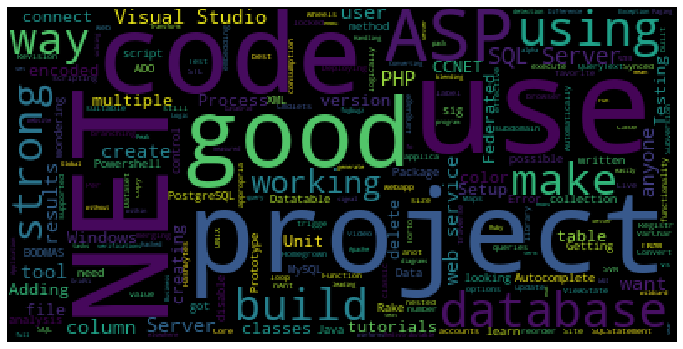

In [10]:
show_wordcloud(df1['QueryText'])

In [11]:
from nltk.tokenize import word_tokenize 
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer 

In [12]:
import re
def text_to_wordlist(text, remove_stopwords=False, stem_words=False):
    # Clean the text, with the option to remove stopwords and to stem words.
    # Convert words to lower case and split them
    text = text.lower().split()
    # Optionally, remove stop words
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
    text = " ".join(text)
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    # Return a list of words
    return(text)

# Clean text
print("Cleaning text...")
nOfTrainQs = len(df1['QueryText'])
trainFullQ1s = []
for i, q in enumerate(df1['QueryText']):
    print("Cleaning Train Q1s: {0:.2f}".format(
    float(i) / nOfTrainQs), end='\r')
    trainFullQ1s.append(text_to_wordlist(q,True,True))

Cleaning text...


In [13]:
#our training set of questions
trainFullQ1s

['sqlstatement execut - multipl queri one statement',
 'good branch merg tutori tortoisesvn',
 'asp net site map',
 'function creat color wheel',
 'ad script function net applic',
 'use nest class case',
 'homegrown consumpt web servic',
 'deploy sql server databas test live',
 'automat updat version number',
 'visual studio setup project - per user registri set',
 'connect databas loop recordset c',
 'get valu built encod viewstat',
 'delet file lock anoth process c',
 'process size unix',
 'use svn revis label build ccnet',
 'make subdomain user account webapp',
 'nant still support suitabl net 3 5 vs2008',
 'window server 2008 server core appropri sql server instanc',
 'best way copi databas',
 'logic reorder column tabl',
 'net unit test packag',
 'feder sync subvers server',
 'languag use postgresql trigger store procedur',
 'convert hashbyt varchar',
 'datat vs dataset',
 'travers collect classic asp',
 'disabl browser autocomplet web form field input tag',
 'good stl - like libr

In [14]:
corpus = trainFullQ1s 

In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
def bow_extractor(corp, ngram_range=(1,1)):
    vectorizer = CountVectorizer(min_df=1, ngram_range=ngram_range)
    features = vectorizer.fit_transform(corpus)
    return vectorizer, features

In [17]:
bow_vectorizer, bow_features = bow_extractor(corpus)

In [18]:
features = bow_features.todense()
print(features)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


In [19]:
features.shape

(56, 212)

In [20]:
feature_names = bow_vectorizer.get_feature_names()

In [21]:
print(feature_names)

['2005', '2008', 'account', 'ad', 'ado', 'alpha', 'analysi', 'anoth', 'anyon', 'apach', 'applic', 'appropri', 'arbg', 'arrow', 'asp', 'authorit', 'autocomplet', 'automat', 'best', 'blend', 'bodma', 'branch', 'browser', 'build', 'built', 'busi', 'case', 'ccnet', 'choic', 'class', 'classic', 'cmdlet', 'code', 'collect', 'color', 'column', 'connect', 'consum', 'consumpt', 'control', 'convert', 'copi', 'core', 'creat', 'data', 'databas', 'datagrid', 'dataset', 'datat', 'delet', 'depend', 'deploy', 'detect', 'diagram', 'differ', 'disabl', 'do', 'dvcs', 'easili', 'effect', 'elsewher', 'embed', 'encod', 'error', 'except', 'execut', 'favorit', 'feder', 'field', 'file', 'fogbugz', 'form', 'full', 'function', 'generat', 'get', 'getter', 'global', 'good', 'got', 'gridview', 'hack', 'handl', 'hashbyt', 'homegrown', 'input', 'instanc', 'is', 'java', 'javascript', 'key', 'label', 'languag', 'layer', 'lead', 'learn', 'librari', 'like', 'live', 'lock', 'logic', 'loop', 'make', 'map', 'mean', 'measur',

In [22]:
def display_features(features, feature_names):
    df = pd.DataFrame(data=features, columns=feature_names)
    print(df)

In [23]:
display_features(features, feature_names)

    2005  2008  account  ad  ado  alpha  analysi  anoth  anyon  apach  ...  \
0      0     0        0   0    0      0        0      0      0      0  ...   
1      0     0        0   0    0      0        0      0      0      0  ...   
2      0     0        0   0    0      0        0      0      0      0  ...   
3      0     0        0   0    0      0        0      0      0      0  ...   
4      0     0        0   1    0      0        0      0      0      0  ...   
5      0     0        0   0    0      0        0      0      0      0  ...   
6      0     0        0   0    0      0        0      0      0      0  ...   
7      0     0        0   0    0      0        0      0      0      0  ...   
8      0     0        0   0    0      0        0      0      0      0  ...   
9      0     0        0   0    0      0        0      0      0      0  ...   
10     0     0        0   0    0      0        0      0      0      0  ...   
11     0     0        0   0    0      0        0      0      0  

In [24]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
transformer = TfidfTransformer(smooth_idf=False)

In [26]:
transformer

TfidfTransformer(norm='l2', smooth_idf=False, sublinear_tf=False, use_idf=True)

In [27]:
count = features

In [28]:
tfidf = transformer.fit_transform(count)

In [29]:
tfidf

<56x212 sparse matrix of type '<class 'numpy.float64'>'
	with 276 stored elements in Compressed Sparse Row format>

In [30]:
X2=tfidf.toarray()
X2[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.42693236, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [31]:
import re
def text_to_wordlist2(text, remove_stopwords=False, stem_words=False):
    # Clean the text, with the option to remove stopwords and to stem words.
    # Convert words to lower case and split them
    text = text.lower().split()
    # Optionally, remove stop words
    if remove_stopwords:
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
    text = " ".join(text)
    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    # Return a list of words
    return(text)

In [32]:
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
queryTFIDF = TfidfVectorizer().fit(corpus)
query1=input("enter a query:")
query1=text_to_wordlist2(query1,True,True)
queryTFIDF = queryTFIDF.transform([query1])

enter a query:


In [34]:
queryTFIDF

<1x212 sparse matrix of type '<class 'numpy.float64'>'
	with 0 stored elements in Compressed Sparse Row format>

In [35]:
cosine_similarities = cosine_similarity(queryTFIDF, X2).flatten()
related_question_indices = cosine_similarities.argsort()[:-20:-1]

In [ ]:
print(queryTFIDF)

In [ ]:
cosine_similarities

In [ ]:
related_question_indices

In [ ]:
df1.QueryText.iloc[1]

In [ ]:
a=related_question_indices[:20]

In [ ]:
df1.KccAns[a]
